# Homework 4

The American Community Survey (ACS) is a large survey of households
and individuals in the United States, carried out by the US
government on a continuous basis (around 3.5 million people are
contacted per year).  It is arguably the most authoritative source
of information about the demographic composition of the US
population, and is used for many purposes in academic research,
government, public policy, and in private industry.

Some of the questions in the ACS are about sensitive topics, and therefore are only released in aggregate form. The "public use microsample" (PUMS) is a set of individual ACS responses that only includes information that has been deemed safe for public release at the individual level. Here we will work with a subset of the ACS/PUMS data.

You will need to refer to the documentation to know what the ACS variable names mean: **[ACS PUMS Codebooks](https://www.census.gov/programs-surveys/acs/microdata/documentation/2018.html)** Scroll down for data dictionary 2018 "1-year" ACS/PUMS, available in several formats. This file is also available as a [PDF on our Google Drive](https://drive.google.com/file/d/1Oact1X4F1USo8rhAU9w4AjhEbFhwpK19/view?usp=drive_link).

For this course, we are providing a simplified version of the ACS/PUMS data from 2018. It contains a random subset of the cases and a selected subset of variables.

Note that many PUMS variables are described as being "household" or "individual" variables. These refer to characteristics of households (one or more people living at the same address) or to characteristics of individual people, respectively.


In [64]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [65]:
acs = pd.read_csv("pums_short.csv.gz")

## Question 1

### Q 1.a

Display the number of rows and columns in the table `acs` as well as the column names.

### Q 1.b

Using the codebook, investigate the `"R65"` column.

* What information is contained in this columns?
* What kind of data is this (nominal, ordinal, quantitative)?
* Produce a plot that shows the distribution of `"R65"` or its key features.
* Interpret the plot: what would say is a typical for for `"VALP"`?
* Compute the cumulative proportions of this variable.
* What proportion of households have either 0 or 1 person aged 65 or older?


### Q 1.c

Using the codebook, investigate the `"VALP"` column.

* What information is contained in this columns?
* What kind of data is this (nominal, ordinal, quantitative)?
* Produce a plot that shows the distribution of `"VALP"` or its key features.
* Interpret the plot: what would you say is a typical for for `"VALP"`?
* Using numerical summaries, compute the proportion of households that are have less than 50,000 in property value, less than 100,000 in property value, and less than 200,000 in property value.
* Compute the 0.1, 0.5, and 0.75 quantiles of `"VALP"`.


### Q 1.d

Using the codebook, investigate the `"REGION"` column.

* What information is contained in this columns?
* What kind of data is this (nominal, ordinal, quantitative)?
* Using the `replace` method for Series objects, replace the numbers in the `"REGION"` column with the names of the regions. Call this new column `"REGION_name"`.
* Produce a plot that shows the distribution of `"REGION_name"` or its key features.
* Calculate the distribution of the `"REGION_name"` column and print out the results. What proportion of households are in the Northeast and the South combined?


## Question 2

### Q 2.a

Review the `"ST"` column in the code book. We can see that the values for `"ST"` are numbers in the data set. Should we consider these to be *nominal* data? Why or why not?

### Q 2.b

Below are two lists with the state codes and the state names listed in the code book for "ST".

Use these with the `replace` method for Series objects to get a new version of the `"ST"` column with nicer, easier to read names. Call this new column `"ST_name"`. Demonstrate your results by printing out the state name of the row at position 101,206 in the table.

In [66]:
# Q1.a
acs.shape

acs.columns

Index(['DIVISION', 'PUMA', 'REGION', 'ST', 'NP', 'MRGP', 'RNTP', 'TEN', 'VALP',
       'VEH', 'YBL', 'FES', 'FINCP', 'FPARC', 'HHT', 'HINCP', 'HUPAC', 'MV',
       'NOC', 'NPF', 'NR', 'NRC', 'PARTNER', 'R18', 'R60', 'R65', 'TAXAMT',
       'WIF', 'WKEXREL', 'WORKSTAT', 'FFINCP'],
      dtype='object')

R65
0.0    0.652720
1.0    0.869787
2.0    1.000000
Name: proportion, dtype: float64
Proportion of households with either 0 or 1 person aged 65 or older: 0.87


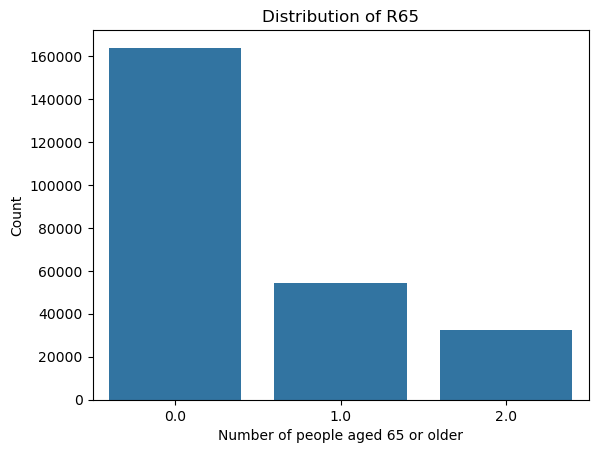

In [67]:
# Q1.b
# Investigate the "R65" column

acs['R65']
# Information about the "R65" column
#The "R65" column contains information about the number of people aged 65 or older in the household. This is a quantitative variable.

sb.countplot(x='R65', data=acs)
plt.title('Distribution of R65')
plt.xlabel('Number of people aged 65 or older')
plt.ylabel('Count')

# Compute the cumulative proportions of "R65"
r65_cumulative = acs['R65'].value_counts(normalize=True).sort_index().cumsum()
print(r65_cumulative)

# Proportion of households with either 0 or 1 person aged 65 or older
proportion_0_or_1 = r65_cumulative.loc[1.0]
print(f"Proportion of households with either 0 or 1 person aged 65 or older: {proportion_0_or_1:.2f}")


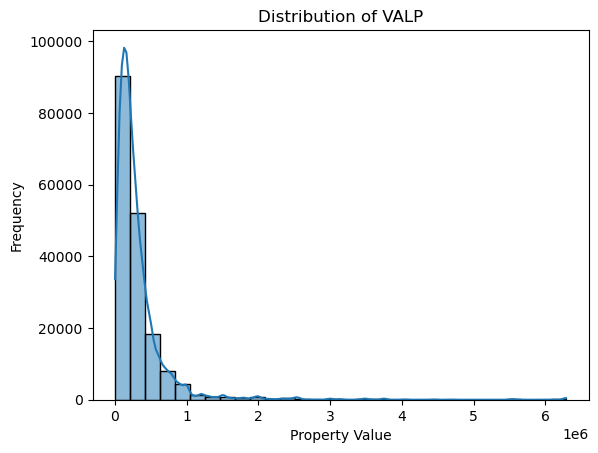

Proportion of households with less than $50,000 in property value: 0.05
Proportion of households with less than $100,000 in property value: 0.13
Proportion of households with less than $200,000 in property value: 0.29
0.10     60000.0
0.50    210000.0
0.75    375000.0
Name: VALP, dtype: float64


In [68]:
# Q 1.c
# Investigate the "VALP" column
#The "VALP" column contains information about the property value of the household. This is a quantitative variable.

# Produce a plot that shows the distribution of "VALP"
sb.histplot(acs['VALP'].dropna(), bins=30, kde=True)
plt.title('Distribution of VALP')
plt.xlabel('Property Value')
plt.ylabel('Frequency')
plt.show()

# Interpret the plot: what would you say is typical for "VALP"?
# The plot shows that the plot is right shewed. Median of property values are clustered at the lower end. 

less_than_50k = (acs['VALP'] < 50000).mean()
less_than_100k = (acs['VALP'] < 100000).mean()
less_than_200k = (acs['VALP'] < 200000).mean()

print(f"Proportion of households with less than $50,000 in property value: {less_than_50k:.2f}")
print(f"Proportion of households with less than $100,000 in property value: {less_than_100k:.2f}")
print(f"Proportion of households with less than $200,000 in property value: {less_than_200k:.2f}")

quantiles = acs['VALP'].quantile([0.1, 0.5, 0.75])
print(quantiles)


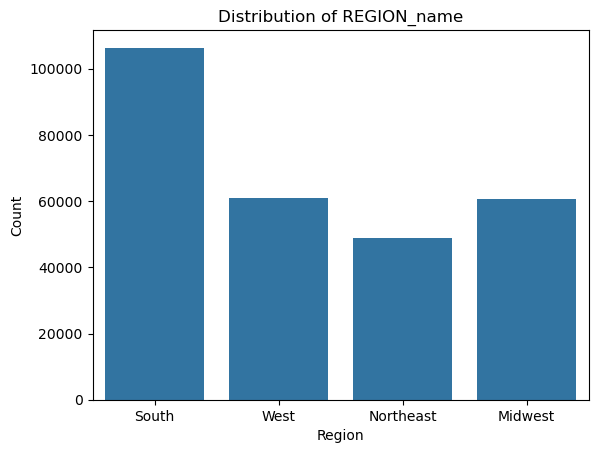

REGION_name
South        0.384388
West         0.219866
Midwest      0.219143
Northeast    0.176603
Name: proportion, dtype: float64
Proportion of households in the Northeast and the South combined: 0.56


In [69]:
#Q 1.d

# The "REGION" column contains information about the region of the United States where the household is located. This is a nominal variable.

region_mapping = {
    1: 'Northeast',
    2: 'Midwest',
    3: 'South',
    4: 'West'
}

acs['REGION_name'] = acs['REGION'].replace(region_mapping)

# Produce a plot that shows the distribution of "REGION_name"
sb.countplot(x='REGION_name', data=acs)
plt.title('Distribution of REGION_name')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

# Calculate the distribution of the "REGION_name" column and print out the results
region_distribution = acs['REGION_name'].value_counts(normalize=True)
print(region_distribution)

# Proportion of households in the Northeast and the South combined
northeast_south_proportion = region_distribution['Northeast'] + region_distribution['South']
print(f"Proportion of households in the Northeast and the South combined: {northeast_south_proportion:.2f}")

In [70]:
# Q 2.a

# The "ST" column is used to identify states but do not have any inherent order or ranking. It should be considered nominal data because the numbers are simply labels for different states and do not imply any quantitative value or order.


In [71]:
# Q 2.b

st_nums = [1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 72]
st_names = "Alabama/AL,Alaska/AK,Arizona/AZ,Arkansas/AR,California/CA,Colorado/CO,Connecticut/CT,Delaware/DE,District of Columbia/DC,Florida/FL,Georgia/GA,Hawaii/HI,Idaho/ID,Illinois/IL,Indiana/IN,Iowa/IA,Kansas/KS,Kentucky/KY,Louisiana/LA,Maine/ME,Maryland/MD,Massachusetts/MA,Michigan/MI,Minnesota/MN,Mississippi/MS,Missouri/MO,Montana/MT,Nebraska/NE,Nevada/NV,New Hampshire/NH,New Jersey/NJ,New Mexico/NM,New York/NY,North Carolina/NC,North Dakota/ND,Ohio/OH,Oklahoma/OK,Oregon/OR,Pennsylvania/PA,Rhode Island/RI,South Carolina/SC,South Dakota/SD,Tennessee/TN,Texas/TX,Utah/UT,Vermont/VT,Virginia/VA,Washington/WA,West Virginia/WV,Wisconsin/WI,Wyoming/WY,Puerto Rico/PRa".split(",")

state_mapping = dict(zip(st_nums, st_names))

# Replace the state codes with state names in the "ST" column
acs['ST_name'] = acs['ST'].replace(state_mapping)

# Print out the state name of the row at position 101,206 in the table
print(acs.loc[[101, 206], 'ST_name'])




101    Alabama/AL
206    Alabama/AL
Name: ST_name, dtype: object


### Q 2.c

Review the codebook for the `PUMA` column. The description notes that we need to "use with ST for unique code." In other words, the same PUMA code may appear in multiple states, so knowing just the PUMA code is not sufficient to know where a household lives.

Verify this result by using `groupby` to create a tall table that contains the number of households in each "ST_name" and "PUMA" combination (hint: recall the `.size()` method). Use the `.reset_index()` method on this result to make it a little easier to work with. Call this table `ST_PUMA`.

Show that PUMA number 100 appears in multiple states.


### Q 2.d

For each state, find the size (in terms of households) of the largest PUMA in that state.


In [72]:
#Q 2.c d 
# Group by "ST_name" and "PUMA" and count the number of households in each combination
ST_PUMA = acs.groupby(['ST_name', 'PUMA']).size().reset_index(name='household_count')

# Show that PUMA number 100 appears in multiple states
puma_100_multiple_states = ST_PUMA[ST_PUMA['PUMA'] == 100]
print(puma_100_multiple_states)

# Find the size of the largest PUMA in each state
largest_puma_per_state = ST_PUMA.groupby('ST_name')['household_count'].max().reset_index(name='largest_household_count')
print(largest_puma_per_state)

                ST_name  PUMA  household_count
0            Alabama/AL   100              160
39           Arizona/AZ   100               97
93          Arkansas/AR   100              203
378         Colorado/CO   100              221
420      Connecticut/CT   100              139
608          Georgia/GA   100              139
680           Hawaii/HI   100              202
690            Idaho/ID   100              179
842             Iowa/IA   100              149
864           Kansas/KS   100              166
886         Kentucky/KY   100              191
920        Louisiana/LA   100              131
954            Maine/ME   100              219
964         Maryland/MD   100              121
1008   Massachusetts/MA   100              209
1060        Michigan/MI   100              313
1128       Minnesota/MN   100              250
1171     Mississippi/MS   100              130
1192        Missouri/MO   100              248
1239         Montana/MT   100               97
1246        N

### Q 2.e

For each `ST_name` and `PUMA` combination, add up the total income of all households. Use `.reset_index(name = "total_income")` to make the table a little easier to work with.

Graph the distribution of total income per ST_state-PUMA combination. Using the graph, answer the following questions:

* What is a typical value for these total incomes? 
* Where do most of the observations falls? 
* Do you see about equal variation across the range of the `total_income` values. 

(Note: there is a good chance the graph axes will be in "scientific notation." A value like 3e7 means $3 \times 10^7$.)


In [ ]:
# Q 2.e

# For each ST_name and PUMA combination, add up the total income of all households
total_income_per_puma = acs.groupby(['ST_name', 'PUMA'])['FINCP'].sum().reset_index(name='total_income')

# Graph the distribution of total income per ST_name-PUMA combination
sb.histplot(total_income_per_puma['total_income'], bins=30, kde=True)
plt.title('Distribution of Total Income per ST_name-PUMA Combination')
plt.xlabel('Total Income')
plt.ylabel('Frequency')
plt.show()

# 1. What is a typical value for these total incomes?
# The typical value for these total incomes can be observed around the peak of the distribution.

# 2. Where do most of the observations fall?
# Most of the observations fall towards the lower end of the total income range.

# 3. Do you see about equal variation across the range of the total_income values?
# The variation is not equal across the range; there is a higher concentration of observations at the lower end of the total income range.